# **Data Analysis Part 3**

## Objectives

Construct additional plots to understand relationships between the categorical variables of the dataset, so as to gain a better understanding of the data

## Inputs

outputs/datasets/collection/student-exam-results.csv

## Outputs
- Plots
- Better understanding of the dataset's patterns and relationships
- Validate hypotheses

## Additional comments

# Change working directory

Since this notebook exists in the jupyter_notebooks directory, we need to change the current working directory from the jupyter_notebooks directory to the workspace, so that any directories created in further codes cells are added in the correct place. 

We access the current directory with the OS packages' `getcwd()` method

In [1]:
import os
current_directory = os.getcwd()
current_directory

'/workspace/Exam-Scores-Analysis/jupyter_notebooks'

We now want to set the working directory as the parent of the current working directory, jupyter_notebooks

- The `os.path.dirname()` method gets the parent directory
- The `os.chir()` method defines the new current directory
- We do this to access all of the project's files and directories, rather than those in the jupyter_notebooks directory

In [2]:
os.chdir(os.path.dirname(current_directory))
print("You set a new current directory")

You set a new current directory


To make certain of things, we now use a code cell to confirm that we have set the current working directory properly

In [3]:
current_directory = os.getcwd()
current_directory

'/workspace/Exam-Scores-Analysis'

Import plotting packages

In [4]:
# import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pingouin as pg
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(18,5)})

# Load Data

In [5]:
df = pd.read_csv('outputs/datasets/collection/student-exam-results.csv')
df.head()

,gender,ethnicity,parental_education,lunch_program,test_preparation_course,math_score,reading_score,writing_score,average_score,literacy_score
0,male,group A,high school,standard,completed,67,67,63,65,65
1,female,group D,some high school,free/reduced,none,40,59,55,51,57
2,male,group E,some college,free/reduced,none,59,60,50,56,55
3,male,group B,high school,standard,none,77,78,68,74,73
4,male,group E,associate's degree,standard,completed,78,73,68,73,70


# Outline

Now that we have determined the factors that influence the exam scores, we can now begin to validate our higher-level hypotheses - those that hypothesize that the categorical variables of the dataset are not independent, and that relationships do exist within them.

These higher-level hypotheses are:

- that increased levels of parental education correlate with increased participation in the test preparation program
- that increased levels of parental education negatively correlate to their children's participation in the free/reduced school lunch program
- that a student's ethnicity has an effect on their parent's educational level
- that a student's ethnicity has an effect on their participation in the free/reduced school lunch program
- that a student's ethnicity has an effect on their participation in the test preparation course
- that a student's gender has an effect on their participation in the test preparation course

To do this, we will need to encode our categorical variable columns with numerical values. We can do this with the `replace()` method and Python dictionaries.


# Preparation

Firstly, we will instantiate a copy of the dataframe with which to work.

In [6]:
df_ca = df.copy()
df_ca.head()

,gender,ethnicity,parental_education,lunch_program,test_preparation_course,math_score,reading_score,writing_score,average_score,literacy_score
0,male,group A,high school,standard,completed,67,67,63,65,65
1,female,group D,some high school,free/reduced,none,40,59,55,51,57
2,male,group E,some college,free/reduced,none,59,60,50,56,55
3,male,group B,high school,standard,none,77,78,68,74,73
4,male,group E,associate's degree,standard,completed,78,73,68,73,70


Now we can define the dictionaries with the numbers with which we will replace the categorical values.

In [7]:
gender_dictionary = {
    'male': 1,
    'female': 2
}

ethnicity_dictionary = {
    'group A': 1,
    'group B': 2,
    'group C': 3,
    'group D': 4,
    'group E': 5
}

parental_education_dictionary = {
    'some high school': 1,
    'high school': 2,
    'some college': 3,
    "associate's degree": 4,
    "bachelor's degree": 5,
    "master's degree": 6
}

lunch_program_dictionary = {
    'standard': 1,
    'free/reduced': 2
}

test_prep_course_dictionary = {
    'completed': 1,
    'none': 2
}

Now we can replace the categorical values.

In [8]:
df_ca['gender'].replace(to_replace=gender_dictionary, inplace=True)
df_ca['ethnicity'].replace(to_replace=ethnicity_dictionary, inplace=True)
df_ca['parental_education'].replace(to_replace=parental_education_dictionary, inplace=True)
df_ca['lunch_program'].replace(to_replace=lunch_program_dictionary, inplace=True)
df_ca['test_preparation_course'].replace(to_replace=test_prep_course_dictionary, inplace=True)
df_ca.head()

,gender,ethnicity,parental_education,lunch_program,test_preparation_course,math_score,reading_score,writing_score,average_score,literacy_score
0,1,1,2,1,1,67,67,63,65,65
1,2,4,1,2,2,40,59,55,51,57
2,1,5,3,2,2,59,60,50,56,55
3,1,2,2,1,2,77,78,68,74,73
4,1,5,4,1,1,78,73,68,73,70


To simplify matters, and because we are only considering the (formerly) categorical variables, we can safely drop the student test scores

In [9]:
df_ca.drop(labels=['math_score', 'reading_score', 'writing_score', 'average_score', 'literacy_score'], axis=1, inplace=True)
df_ca.head()

,gender,ethnicity,parental_education,lunch_program,test_preparation_course
0,1,1,2,1,1
1,2,4,1,2,2
2,1,5,3,2,2
3,1,2,2,1,2
4,1,5,4,1,1


Since we are looking to determine if there are any extant relationships in the dataset's categorical variables, it seems that I might be best served looking at correlations. Let's generate a correlation table, and then visualise it with a heatmap:

In [10]:
df_ca_corr = df_ca.corr(method='pearson')
df_ca_corr

,gender,ethnicity,parental_education,lunch_program,test_preparation_course
gender,1.000000,-0.063231,-0.016830,-0.033962,0.007653
ethnicity,-0.063231,1.000000,-0.057522,0.033335,0.029828
parental_education,-0.016830,-0.057522,1.000000,-0.016037,-0.013075
lunch_program,-0.033962,0.033335,-0.016037,1.000000,0.029267
test_preparation_course,0.007653,0.029828,-0.013075,0.029267,1.000000


/tmp/ipykernel_1567/3479673894.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df_ca_corr, dtype=np.bool)


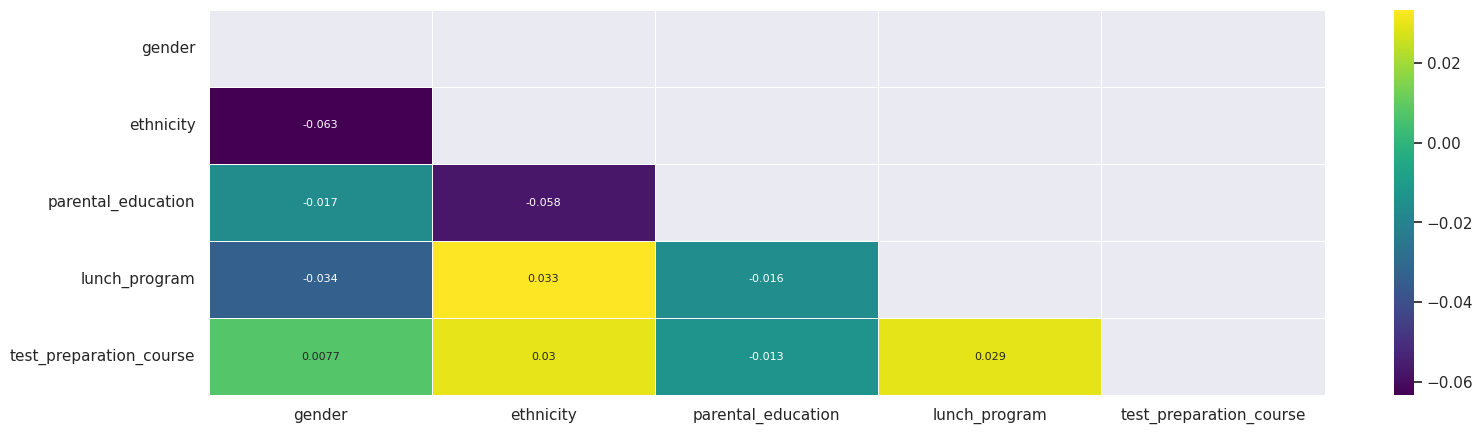

In [11]:
mask = np.zeros_like(df_ca_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_ca_corr, annot=True, mask=mask, cmap='viridis', annot_kws={"size": 8}, linewidths=0.5)
plt.ylim(df_ca_corr.shape[1],0)
plt.show()

It seems that the correlation method has failed to reveal any significant relationships - we see that the correlation table and the heatmap shows very weak correlations. This may mean that the categorical variables are truly independent, and that none of them has any meaningful influence on the others. However, we should investigate further before we can say this for sure. It may just be that the correlation analysis cannot extract meaningful relationships from numerical values over a small range.

My alternative approach here will be to examine each hypothesized relationship individually, in hopes that a more targeted study will reveal insights.

## Parental education - test prep course

We will now validate the hypothesis that increased parental education correlates with increased student participation in the test preparation course. To do this, we will cut down the encoded dataframe to just the `parental_education` and `test_preparation_course` columns

In [12]:
df_ca_1 = df_ca.filter(['parental_education', 'test_preparation_course'])
df_ca_1.head()

,parental_education,test_preparation_course
0,2,1
1,1,2
2,3,2
3,2,2
4,4,1


Now we can begin to identify relationships. We want to see how many counts of each `parental_education` category there are for each of the 2 values of `test_preparation_course`. To do this, we can use the `query()` method to produce 2 dataframes, one for each value of `test_preparation_course`.

In [13]:
df_ca_1_1 = df_ca_1.query('test_preparation_course == 1')
df_ca_1_1.head()
# For reference - test_preparation_course category of 1 means the student has completed the test preparation course

,parental_education,test_preparation_course
0,2,1
4,4,1
7,3,1
10,3,1
11,2,1


In [14]:
df_ca_1_2 = df_ca_1.query('test_preparation_course == 2')
df_ca_1_2.head()
# For reference - test_preparation_course category of 2 means the student has NOT completed the test preparation course

,parental_education,test_preparation_course
1,1,2
2,3,2
3,2,2
5,2,2
6,5,2


We can now use the `value_counts()` method to return the number of unique values of `parental_education`

In [15]:
df_ca_1_1['parental_education'].value_counts()

3    82
4    75
1    63
2    57
5    39
6    19
Name: parental_education, dtype: int64

In [16]:
df_ca_1_2['parental_education'].value_counts()

2    145
3    140
1    128
4    128
5     73
6     51
Name: parental_education, dtype: int64

These 2 Series are not overly useful - If we return to the notebook 02-DataAnalysis1, and examine the Pandas Profile Report, we remind ourselves that the test_preparation_course column contains approximately twice as many entries for `none` asfor `completed` - 665 vs 335. Therefore, we should expect `df_categorical_analysis_1_2` to contain more value counts for each category of the `parental_education` column. To solve this, we can normalize the value counts. To make the 2 series such that they can be interpreted easily, we will sort them by the `parental_education` column's values, using those values as an index.

In [17]:
ps_ca_1_1_vc = df_ca_1_1['parental_education'].value_counts(normalize=True).sort_index()
ps_ca_1_1_vc
# test preparation course completed

1    0.188060
2    0.170149
3    0.244776
4    0.223881
5    0.116418
6    0.056716
Name: parental_education, dtype: float64

In [18]:
ps_ca_1_2_vc = df_ca_1_2['parental_education'].value_counts(normalize=True).sort_index()
ps_ca_1_2_vc
# test preparation course NOT completed

1    0.192481
2    0.218045
3    0.210526
4    0.192481
5    0.109774
6    0.076692
Name: parental_education, dtype: float64

We can now construct barplots to visualise this information

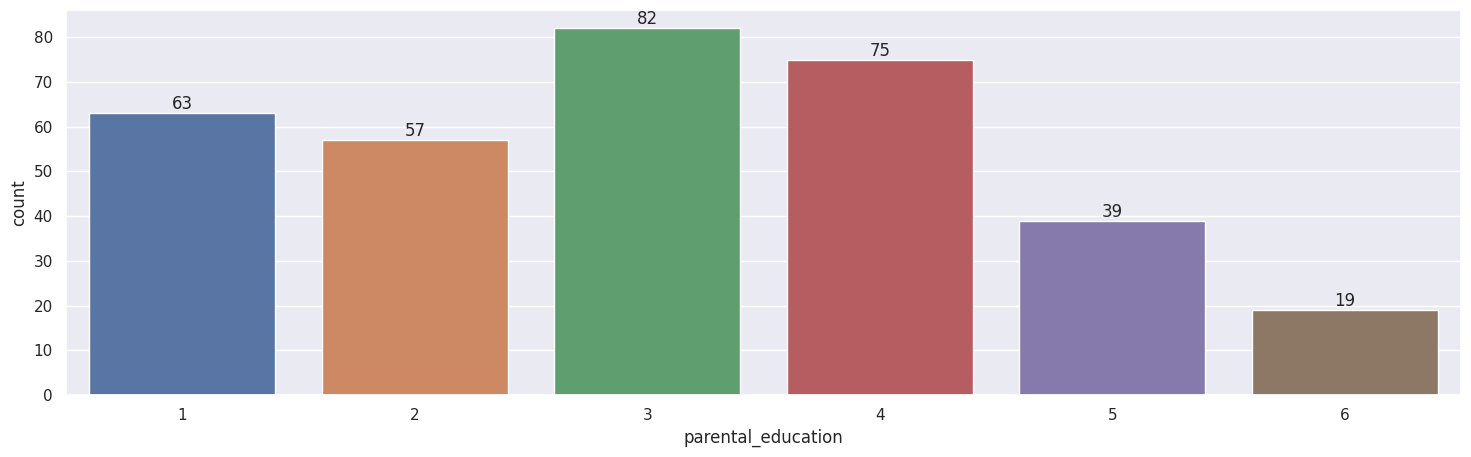

In [19]:
parental_education_test_prep_course_1 = sns.countplot(data=df_ca_1_1, x='parental_education')
plt.bar_label(parental_education_test_prep_course_1.containers[0])
plt.show()

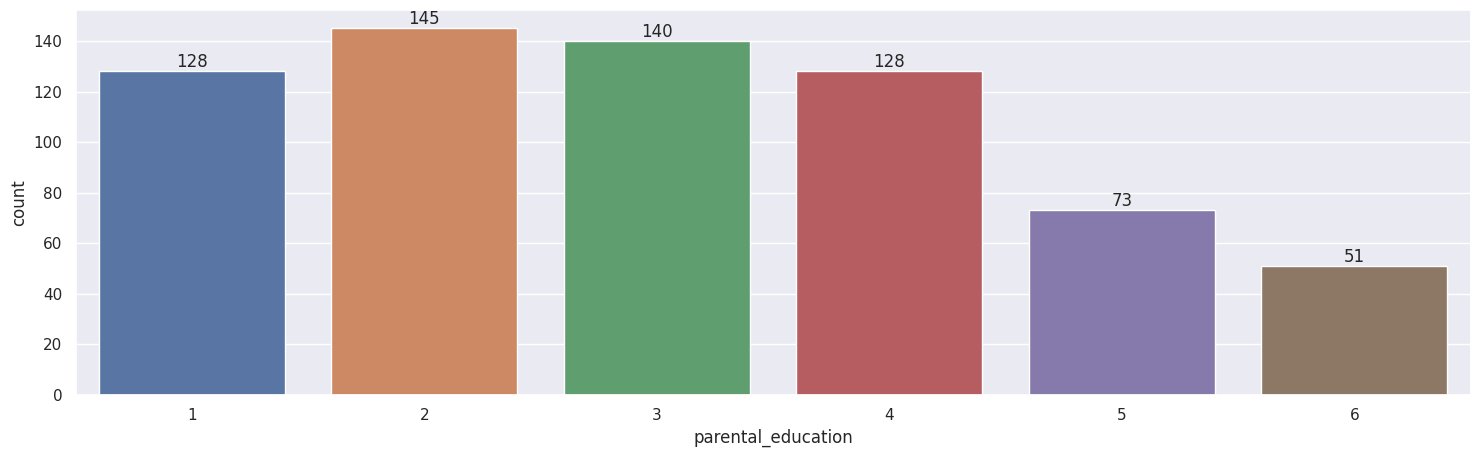

In [20]:
parental_education_test_prep_course_2 = sns.countplot(data=df_ca_1_2, x='parental_education')
plt.bar_label(parental_education_test_prep_course_2.containers[0])
plt.show()

These barplots are somewhat more useful, however we have the same problem as with the un-normalised output of the `value_counts()` method - we cannot compare the 2 plots in relative terms. 

After some research, I found [this StackOverflow question](https://stackoverflow.com/questions/34615854/seaborn-countplot-with-normalized-y-axis-per-group). It appears that Seaborn has no native ability to generate countplots that use normalised counts on the y-axis. A way around this is to use the `density` or `percent` as the `stat` parameter. This is used below:

<AxesSubplot: xlabel='parental_education', ylabel='Percent'>

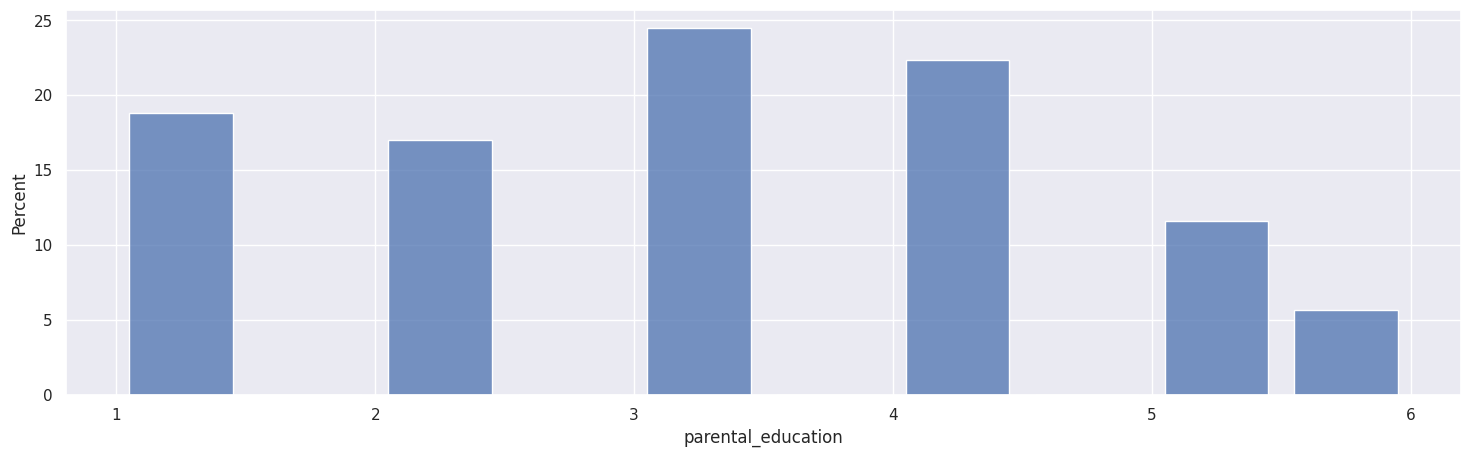

In [21]:
sns.histplot(x = df_ca_1_1['parental_education'], multiple="dodge", stat = 'percent', shrink = 0.8, common_norm=False)
# test prep course completed

<AxesSubplot: xlabel='parental_education', ylabel='Percent'>

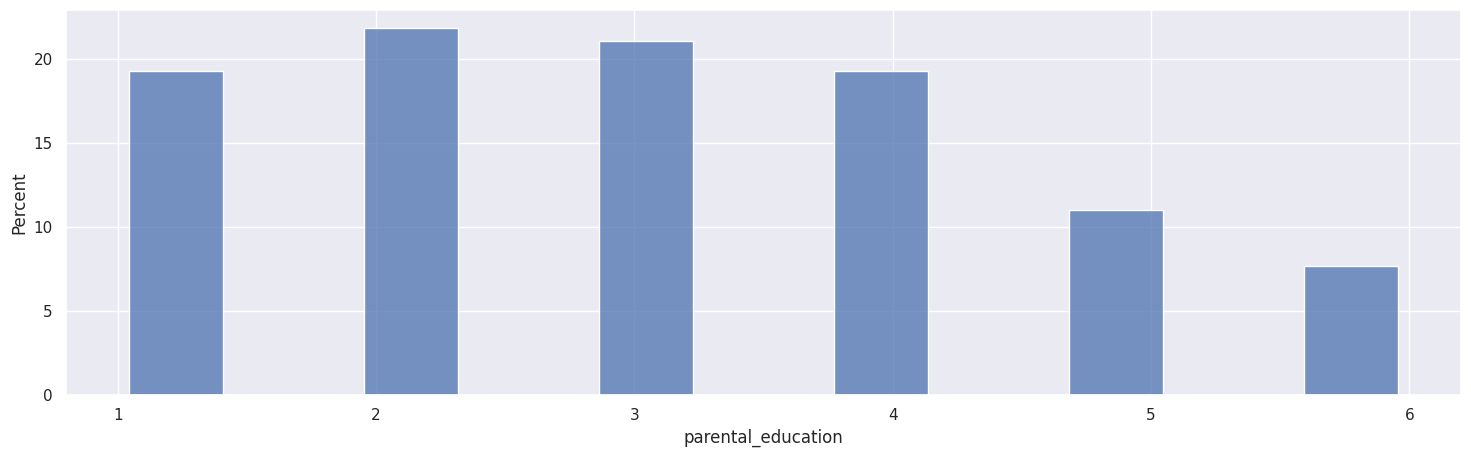

In [22]:
sns.histplot(x = df_ca_1_2['parental_education'], multiple="dodge", stat = 'percent', shrink = 0.8, common_norm=False)
# Test prep course not completed

These 2 plots are useful. However, I am concerned that, since these are histograms, that the bins are not being created properly, as evidenced by the 'squashed' nature of the last 2 columns of the first plot, and the fact that the columns are not centered over the x-axis numbers. Hence, we may be drawing inaccurate conclusions.

After some thought, I considered that the initial idea of barplots was correct in principle, if not in execution. Instead, I will append the normalised value counts to the dataframes created from the `query()` method. Barplots can then be created using the exact value counts of each category. 

In [23]:
# df_ca_1_1['n-v-c'] = df_ca_1_1['parental_education'].value_counts(normalize=True).sort_index()
# df_ca_1_1

df_ca_1_1_vc = pd.DataFrame(data={
    'parental_education': ('some high school', 'high school', 'some college', 'associates degree', 'bachelors degree', 'masters degree'),
    'n-v-c': ps_ca_1_1_vc
})

df_ca_1_1_vc

,parental_education,n-v-c
1,some high school,0.188060
2,high school,0.170149
3,some college,0.244776
4,associates degree,0.223881
5,bachelors degree,0.116418
6,masters degree,0.056716


In [24]:
df_ca_1_2_vc = pd.DataFrame(data={
    'parental_education': ('some high school', 'high school', 'some college', 'associates degree', 'bachelors degree', 'masters degree'),
    'n-v-c': ps_ca_1_2_vc
})

df_ca_1_2_vc

,parental_education,n-v-c
1,some high school,0.192481
2,high school,0.218045
3,some college,0.210526
4,associates degree,0.192481
5,bachelors degree,0.109774
6,masters degree,0.076692


Now that the dataframes are constructed, we can use them to construct barplots - the x-axis will be the level of parental education and the y-axis will be the normalised value counts

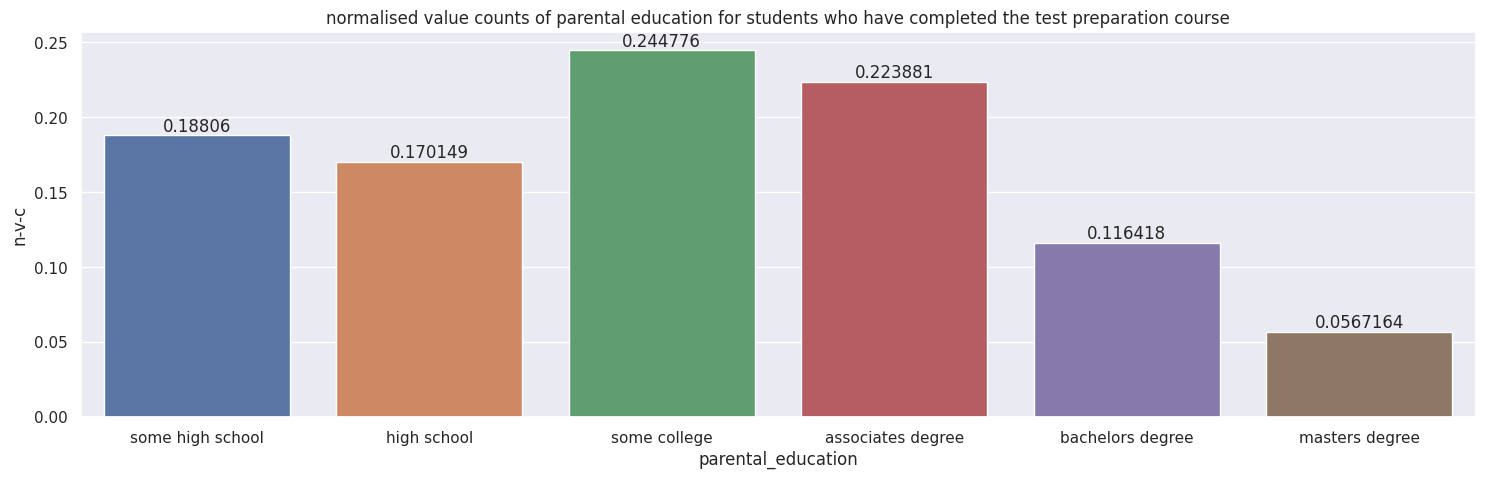

In [25]:
fig_ca_1_1 = sns.barplot(x = df_ca_1_1_vc['parental_education'], y = df_ca_1_1_vc['n-v-c'])
plt.bar_label(fig_ca_1_1.containers[0])
plt.title('normalised value counts of parental education for students who have completed the test preparation course')
plt.show()

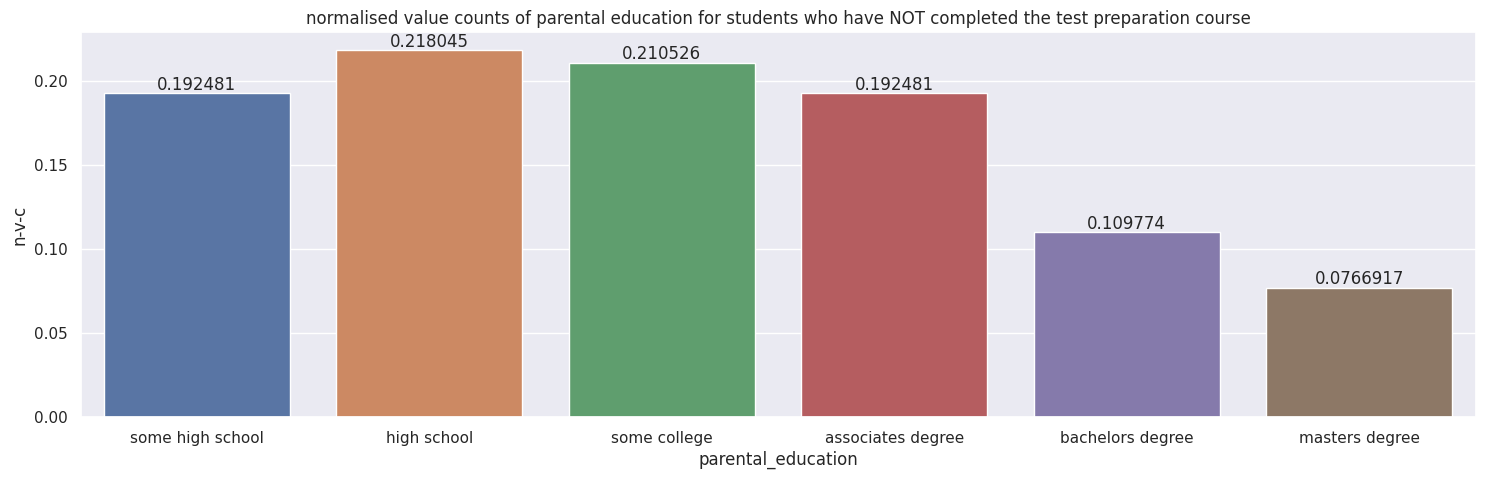

In [26]:
fig_ca_1_2 = sns.barplot(x = df_ca_1_2_vc['parental_education'], y = df_ca_1_2_vc['n-v-c'])
plt.bar_label(fig_ca_1_2.containers[0])
plt.title('normalised value counts of parental education for students who have NOT completed the test preparation course')
plt.show()

These two plots show that parental education does indeed have an influence on student participation in the test preparation course, though not as much as I would have expected. At the very highest levels of parental education - bachelor's degrees and master's degrees - there is no appreciable difference in student participation in the test preparation course. However, at the lower levels of parental education, there is a definite bias toward their children not participating in the test preparation course. If we examine the first plot, where students have completed the test preparation course, there are large and noticeable jump in percentages of parents who have at least some college education.

As an added bonus, these plots are also more visually appealing and informative than the histogram plots. Since the barplots do not use bins, the bars of the plot are evenly spaced, leading to a more positive user experience.


## Parental education - school lunch program

We can now validate the hypothesis that increased levels of parental education negatively correlate with student participation in the free/reduced school lunch program. Or, put another way - increased levels of parental education postively correlate with student participation in the standard school lunch program.

Now that we have narrowed down the method by which we can establish relationships, we do validate this hypothesis quicker. First, we must filter the encoded dataframe down to the columns that we require.

In [27]:
df_ca_2 = df_ca.filter(['parental_education', 'lunch_program'])
df_ca_2

,parental_education,lunch_program
0,2,1
1,1,2
2,3,2
3,2,1
4,4,1
...,...,...
995,2,1
996,4,2
997,1,2
998,3,1


Now we can generate 2 dataframes - one for students who are on the standard lunch program, and another for students who are on the free/reduced lunch program.

In [28]:
df_ca_2_1 = df_ca_2.query('lunch_program == 1')
df_ca_2_1.head()
# standard lunch program

,parental_education,lunch_program
0,2,1
3,2,1
4,4,1
5,2,1
6,5,1


In [29]:
df_ca_2_2 = df_ca_2.query('lunch_program == 2')
df_ca_2_2.head()
# free/reduced lunch program

,parental_education,lunch_program
1,1,2
2,3,2
9,3,2
15,4,2
18,4,2


Now we can generate the normalised value counts

In [30]:
ps_ca_2_1_vc = df_ca_2_1['parental_education'].value_counts(normalize=True).sort_index()
ps_ca_2_1_vc
# standard lunch program

1    0.190184
2    0.208589
3    0.205521
4    0.202454
5    0.122699
6    0.070552
Name: parental_education, dtype: float64

In [31]:
ps_ca_2_2_vc = df_ca_2_2['parental_education'].value_counts(normalize=True).sort_index()
ps_ca_2_2_vc
# free/reduced lunch program

1    0.192529
2    0.189655
3    0.252874
4    0.204023
5    0.091954
6    0.068966
Name: parental_education, dtype: float64

We can generate the dataframes which we will use to construct the barplots.

In [32]:
df_ca_2_1_vc = pd.DataFrame(data={
    'parental_education': ('some high school', 'high school', 'some college', 'associates degree', 'bachelors degree', 'masters degree'),
    'n-v-c': ps_ca_2_1_vc
})

df_ca_2_1_vc

,parental_education,n-v-c
1,some high school,0.190184
2,high school,0.208589
3,some college,0.205521
4,associates degree,0.202454
5,bachelors degree,0.122699
6,masters degree,0.070552


In [33]:
df_ca_2_2_vc = pd.DataFrame(data={
    'parental_education': ('some high school', 'high school', 'some college', 'associates degree', 'bachelors degree', 'masters degree'),
    'n-v-c': ps_ca_2_2_vc
})

df_ca_2_2_vc

,parental_education,n-v-c
1,some high school,0.192529
2,high school,0.189655
3,some college,0.252874
4,associates degree,0.204023
5,bachelors degree,0.091954
6,masters degree,0.068966


We may now construct the barplots.

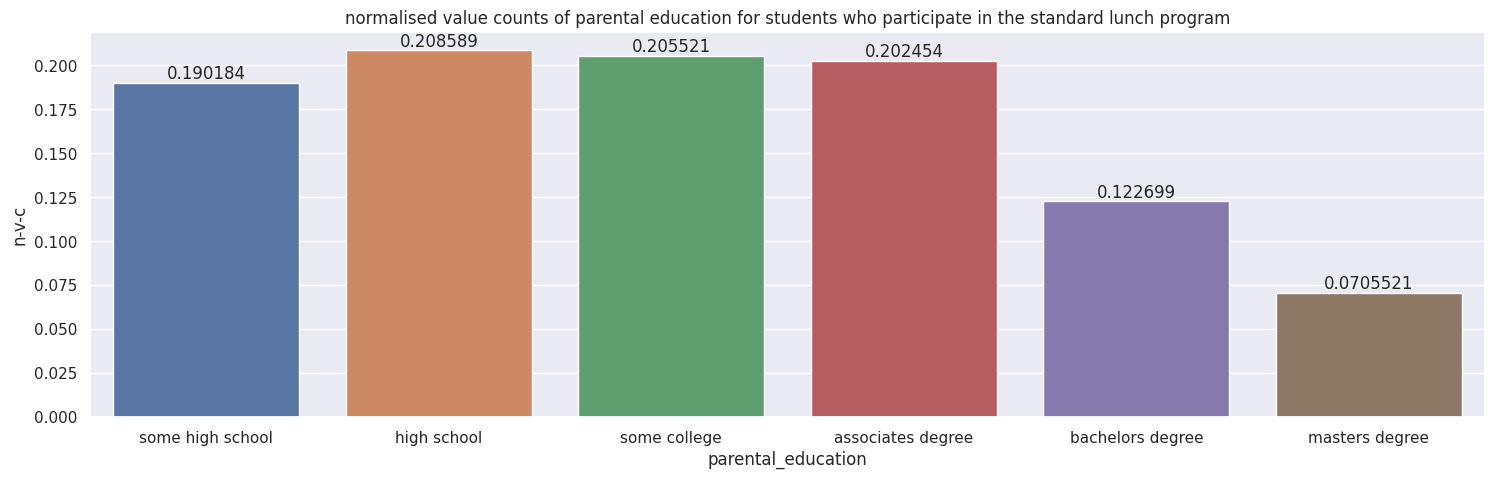

In [34]:
fig_ca_2_1 = sns.barplot(x = df_ca_2_1_vc['parental_education'], y = df_ca_2_1_vc['n-v-c'])
plt.bar_label(fig_ca_2_1.containers[0])
plt.title('normalised value counts of parental education for students who participate in the standard lunch program')
plt.show()

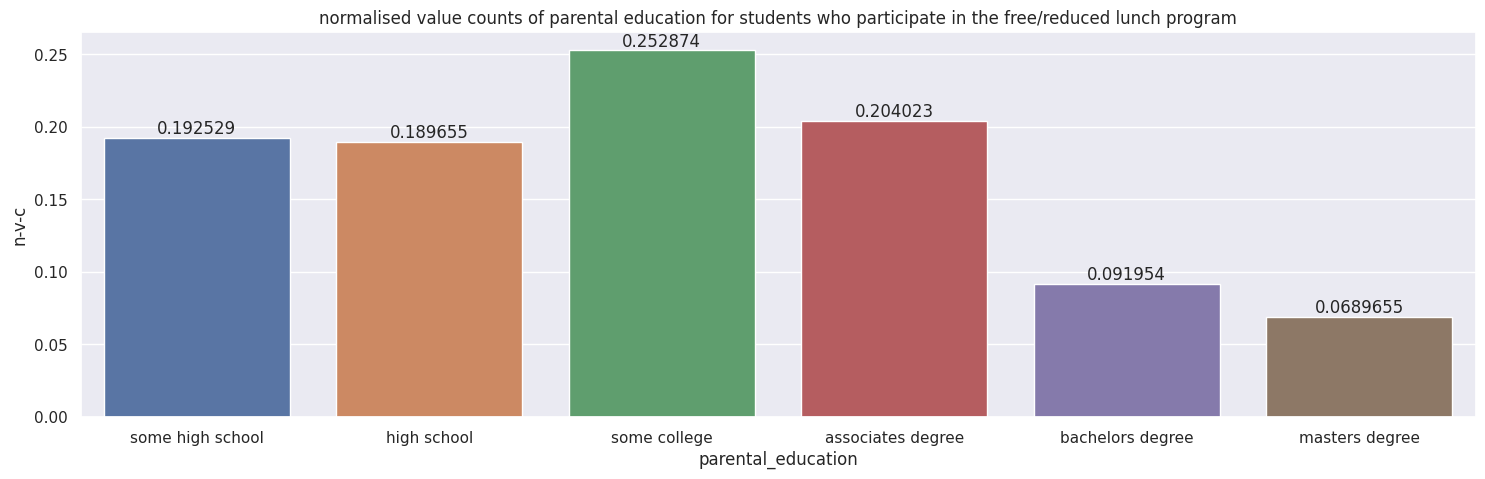

In [35]:
fig_ca_2_2 = sns.barplot(x = df_ca_2_2_vc['parental_education'], y = df_ca_2_2_vc['n-v-c'])
plt.bar_label(fig_ca_2_2.containers[0])
plt.title('normalised value counts of parental education for students who participate in the free/reduced lunch program')
plt.show()

These plots and the normalised value counts show that parental education levels appears to influence student participation in the school lunch program.

However, on closer inspection we see that this influence is slight:
- Parents who have master's degrees see their students participate in both lunch programs at roughly the same rate - about 7%
- Parents who have bachelor's degrees see their students participate in standard lunch program at a slightly higher rate - about 12% versus 9%
- Parents who have some high school education, have completed high school or who have associates degrees participate in both lunch programs at roughly the same rate, about 20% for each level of education
- The only level of parental education where there is a noticeable difference in lunch program participation rates is for those parents who have only some college education. Students with these parents participate in the free/reduced lunch program at a rate of 25% vs 20% for the standard program.

Our hypothesis can now be validated, but we have hypothesised incorrectly. The hypothesis states that parental education influences the lunch program that students participate in. However, we have shown that parental education does not meaningfully influence the lunch program that a student participates in, unless the parents have only some college education and to a lesser extent, a bachelor's degree.

## Parental education - Ethnicity

We can now begin to validate the hypothesis that a student's ethnicity and their parent's level of education are linked. 

As before, now that we have narrowed down the method by which we can establish relationships, we can do so quicker. However, the previous 2 analyses had 1 categorical variable possessing ony 2 categories. In this analysis, both `ethnicity` and `parental_education` have multiple categories. To simplify matters slightly, we shall use `ethnicity` as the variable which we will generate the normalised value counts for `parental_education` against. This will allow us to generate 5 plots rather than 6.

First, we must filter the encoded dataframe down to the `ethnicity` and `parental_education` columns.

In [36]:
df_ca_3 = df_ca.filter(['ethnicity', 'parental_education'])
df_ca_3.head()

,ethnicity,parental_education
0,1,2
1,4,1
2,5,3
3,2,2
4,5,4


Now we can query for each ethnicity

In [37]:
df_ca_3_1 = df_ca_3.query('ethnicity == 1')
df_ca_3_1.head()
# ethnicity A

,ethnicity,parental_education
0,1,2
6,1,5
29,1,1
31,1,5
32,1,1


In [38]:
df_ca_3_2 = df_ca_3.query('ethnicity == 2')
df_ca_3_2.head()
# ethnicity B

,ethnicity,parental_education
3,2,2
16,2,2
22,2,3
23,2,3
28,2,2


In [39]:
df_ca_3_3 = df_ca_3.query('ethnicity == 3')
df_ca_3_3.head()
# ethnicity C

,ethnicity,parental_education
9,3,3
13,3,2
17,3,4
18,3,4
19,3,3


In [40]:
df_ca_3_4 = df_ca_3.query('ethnicity == 4')
df_ca_3_4.head()
# ethnicity D

,ethnicity,parental_education
1,4,1
5,4,2
8,4,2
11,4,2
12,4,4


In [41]:
df_ca_3_5 = df_ca_3.query('ethnicity == 5')
df_ca_3_5.head()
# ethnicity E

,ethnicity,parental_education
2,5,3
4,5,4
7,5,3
10,5,3
14,5,1


Now we can generate normalised value counts

In [42]:
ps_ca_3_1_vc = df_ca_3_1['parental_education'].value_counts(normalize=True).sort_index()
ps_ca_3_1_vc
# ethnicity A

1    0.139241
2    0.189873
3    0.253165
4    0.139241
5    0.177215
6    0.101266
Name: parental_education, dtype: float64

In [43]:
ps_ca_3_2_vc = df_ca_3_2['parental_education'].value_counts(normalize=True).sort_index()
ps_ca_3_2_vc
# ethnicity B

1    0.185366
2    0.190244
3    0.239024
4    0.195122
5    0.097561
6    0.092683
Name: parental_education, dtype: float64

In [44]:
ps_ca_3_3_vc = df_ca_3_3['parental_education'].value_counts(normalize=True).sort_index()
ps_ca_3_3_vc
# ethnicity C

1    0.204334
2    0.179567
3    0.213622
4    0.232198
5    0.108359
6    0.061920
Name: parental_education, dtype: float64

In [45]:
ps_ca_3_4_vc = df_ca_3_4['parental_education'].value_counts(normalize=True).sort_index()
ps_ca_3_4_vc
# ethnicity D

1    0.194656
2    0.225191
3    0.217557
4    0.190840
5    0.110687
6    0.061069
Name: parental_education, dtype: float64

In [46]:
ps_ca_3_5_vc = df_ca_3_5['parental_education'].value_counts(normalize=True).sort_index()
ps_ca_3_5_vc
# ethnicity E

1    0.190840
2    0.236641
3    0.206107
4    0.206107
5    0.106870
6    0.053435
Name: parental_education, dtype: float64

We can now construct the dataframes

In [47]:
df_ca_3_1_vc = pd.DataFrame(data={
    'parental_education': ('some high school', 'high school', 'some college', 'associates degree', 'bachelors degree', 'masters degree'),
    'n-v-c': ps_ca_3_1_vc
})

df_ca_3_1_vc

,parental_education,n-v-c
1,some high school,0.139241
2,high school,0.189873
3,some college,0.253165
4,associates degree,0.139241
5,bachelors degree,0.177215
6,masters degree,0.101266


In [48]:
df_ca_3_2_vc = pd.DataFrame(data={
    'parental_education': ('some high school', 'high school', 'some college', 'associates degree', 'bachelors degree', 'masters degree'),
    'n-v-c': ps_ca_3_2_vc
})

df_ca_3_2_vc

,parental_education,n-v-c
1,some high school,0.185366
2,high school,0.190244
3,some college,0.239024
4,associates degree,0.195122
5,bachelors degree,0.097561
6,masters degree,0.092683


In [49]:
df_ca_3_3_vc = pd.DataFrame(data={
    'parental_education': ('some high school', 'high school', 'some college', 'associates degree', 'bachelors degree', 'masters degree'),
    'n-v-c': ps_ca_3_3_vc
})

df_ca_3_3_vc

,parental_education,n-v-c
1,some high school,0.204334
2,high school,0.179567
3,some college,0.213622
4,associates degree,0.232198
5,bachelors degree,0.108359
6,masters degree,0.061920


In [50]:
df_ca_3_4_vc = pd.DataFrame(data={
    'parental_education': ('some high school', 'high school', 'some college', 'associates degree', 'bachelors degree', 'masters degree'),
    'n-v-c': ps_ca_3_4_vc
})

df_ca_3_4_vc

,parental_education,n-v-c
1,some high school,0.194656
2,high school,0.225191
3,some college,0.217557
4,associates degree,0.190840
5,bachelors degree,0.110687
6,masters degree,0.061069


In [51]:
df_ca_3_5_vc = pd.DataFrame(data={
    'parental_education': ('some high school', 'high school', 'some college', 'associates degree', 'bachelors degree', 'masters degree'),
    'n-v-c': ps_ca_3_5_vc
})

df_ca_3_5_vc

,parental_education,n-v-c
1,some high school,0.190840
2,high school,0.236641
3,some college,0.206107
4,associates degree,0.206107
5,bachelors degree,0.106870
6,masters degree,0.053435


Now we can construct the barplots with the normalised value counts

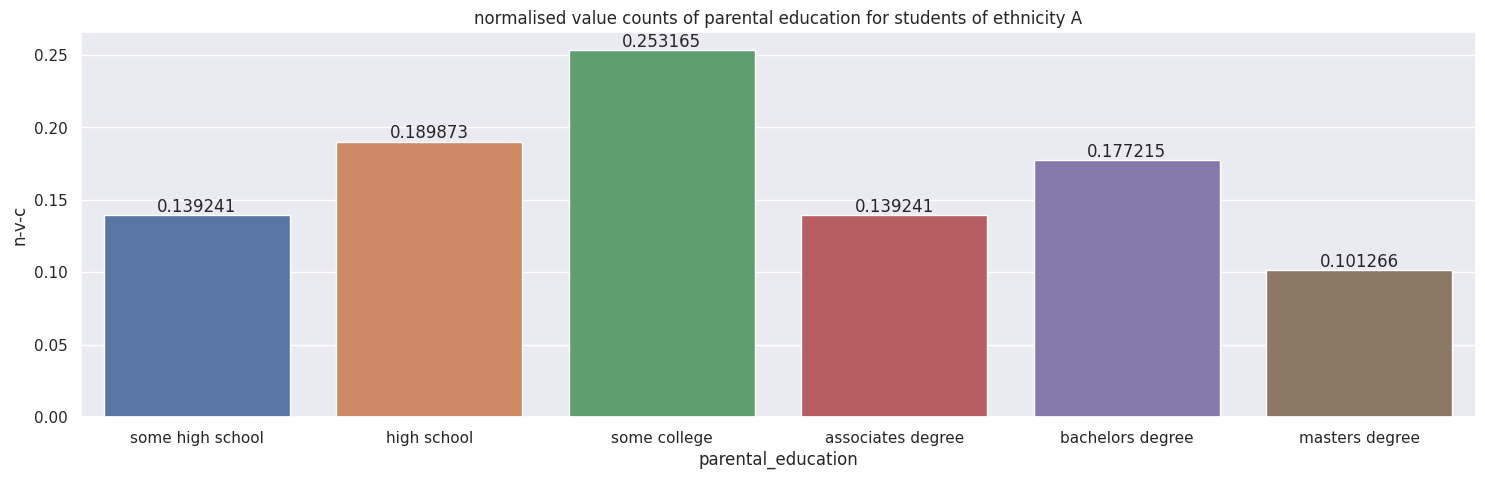

In [52]:
fig_ca_3_1 = sns.barplot(x = df_ca_3_1_vc['parental_education'], y = df_ca_3_1_vc['n-v-c'])
plt.bar_label(fig_ca_3_1.containers[0])
plt.title('normalised value counts of parental education for students of ethnicity A')
plt.show()

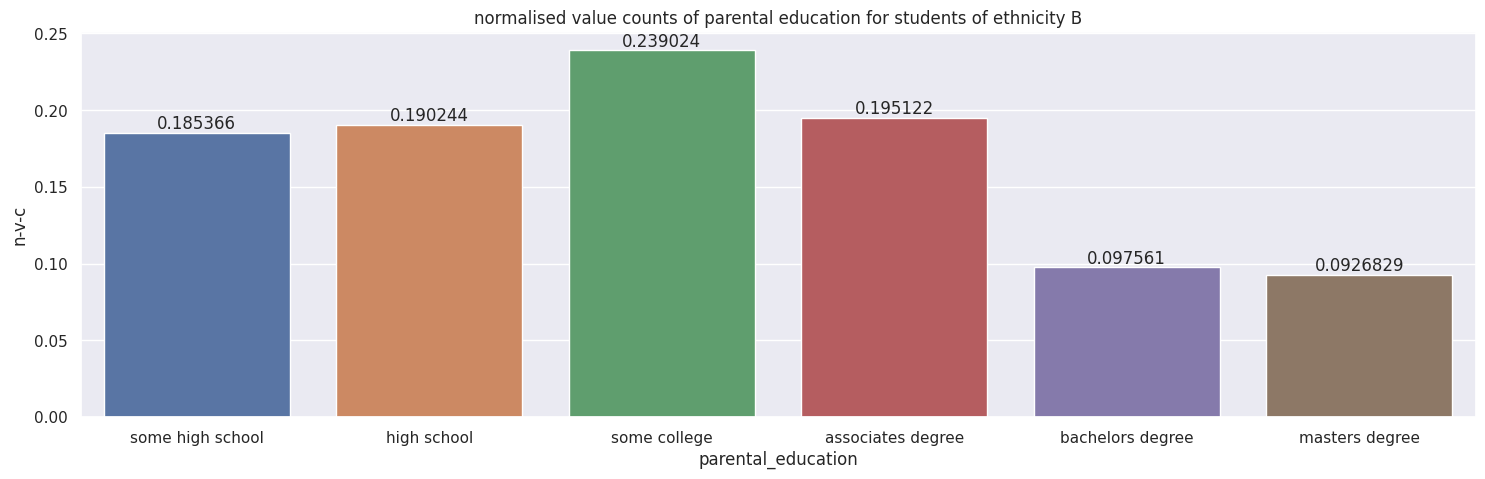

In [53]:
fig_ca_3_2 = sns.barplot(x = df_ca_3_2_vc['parental_education'], y = df_ca_3_2_vc['n-v-c'])
plt.bar_label(fig_ca_3_2.containers[0])
plt.title('normalised value counts of parental education for students of ethnicity B')
plt.show()

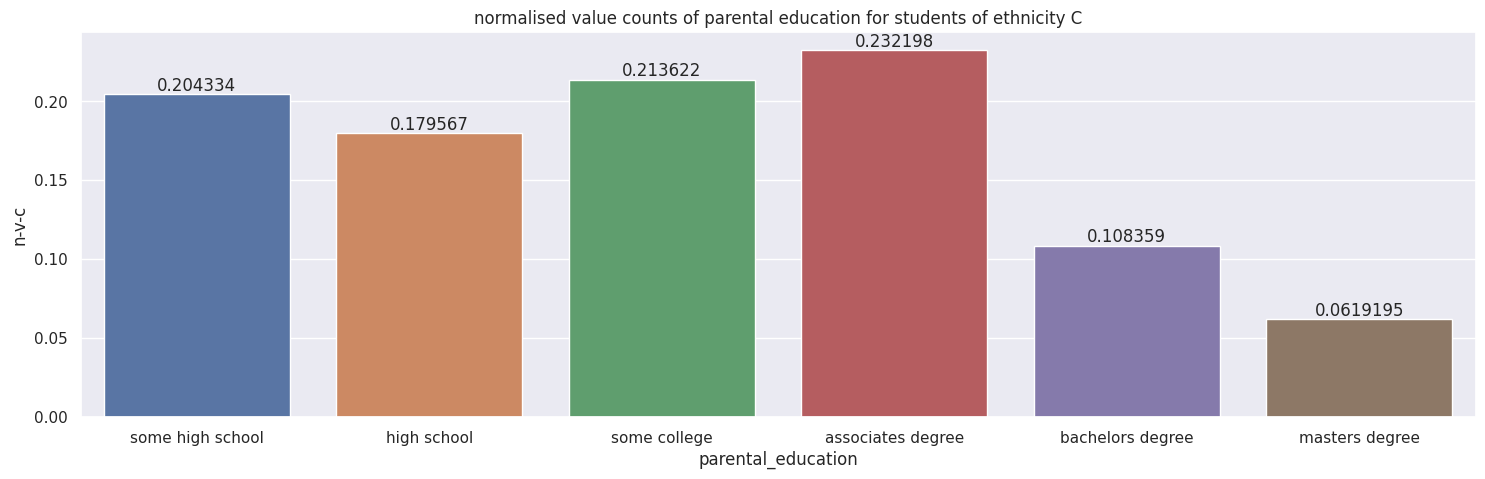

In [54]:
fig_ca_3_3 = sns.barplot(x = df_ca_3_3_vc['parental_education'], y = df_ca_3_3_vc['n-v-c'])
plt.bar_label(fig_ca_3_3.containers[0])
plt.title('normalised value counts of parental education for students of ethnicity C')
plt.show()

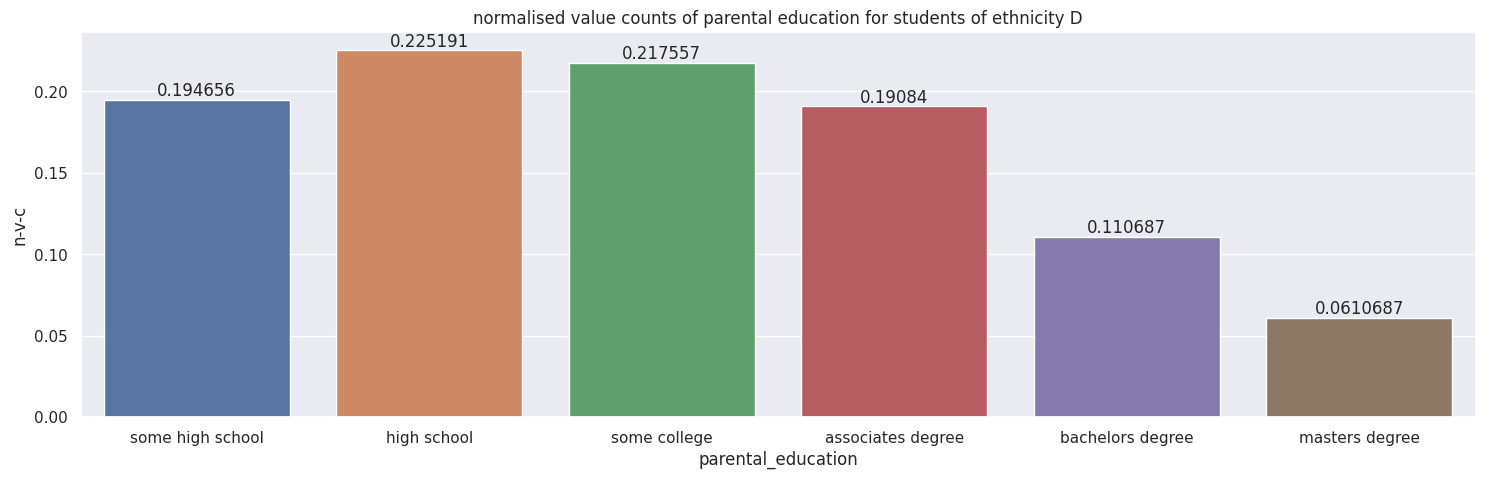

In [55]:
fig_ca_3_4 = sns.barplot(x = df_ca_3_4_vc['parental_education'], y = df_ca_3_4_vc['n-v-c'])
plt.bar_label(fig_ca_3_4.containers[0])
plt.title('normalised value counts of parental education for students of ethnicity D')
plt.show()

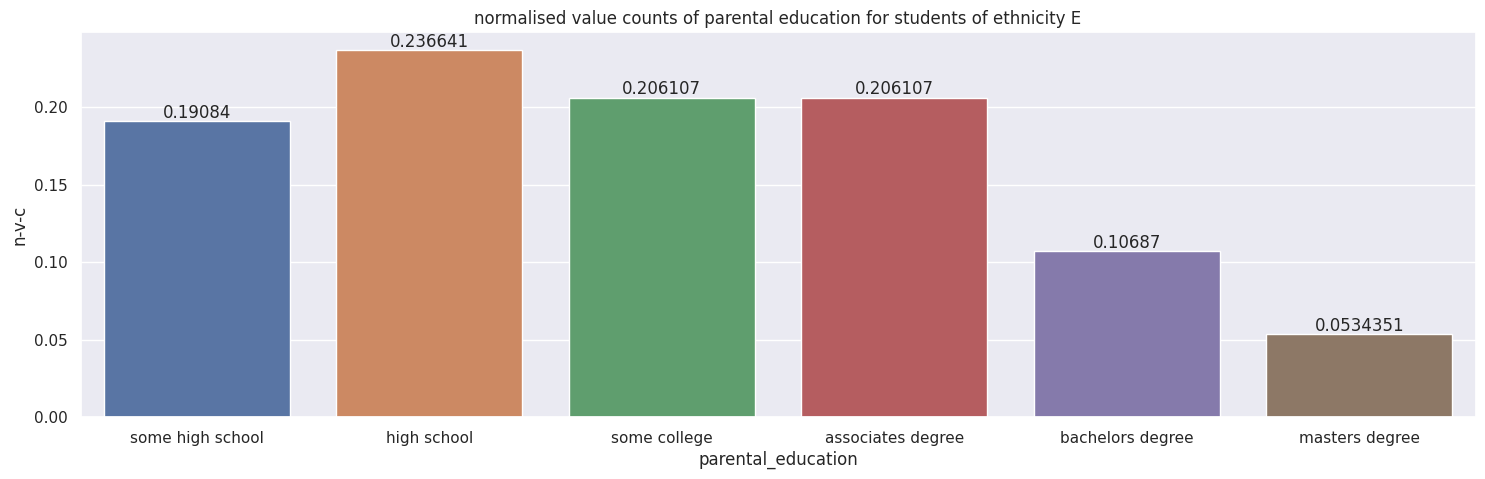

In [56]:
fig_ca_3_5 = sns.barplot(x = df_ca_3_5_vc['parental_education'], y = df_ca_3_5_vc['n-v-c'])
plt.bar_label(fig_ca_3_5.containers[0])
plt.title('normalised value counts of parental education for students of ethnicity E')
plt.show()

There is a lot of information in these plots. To properly determine the relationships, we will consider each level of parental education.

- Parents who have only some high school education occur at a rate of approximately 20% across all ethnicities. The major exception is Ethnicity A, which has a rate of 14%. 

- Parents who have a high school education occur at a rate of about 17% to 19% for ethnicities A through C. Ethnicities D and E have rates in excess of 22%

- Parents who have some college education occur at a rate of about 20% for ethnicities C, D and E. Ethnicites A and B have a rate of about 24%

- Parents who have associates degrees occur at a rate of about for ethnicities B, D and E. Ethnicity A has a rate of 14% whilst ethnicity C has a rate of 23%

- Parents who have bachelors degrees occur at a rate of about 10% for all ethnicities, except for ethnicity A, which has a rate of 17%

- Parents who have masters degrees occur at a rate of about 5 or 6% for ethnicities C, D and E. Ethnicities A and B have a rate of about 10%

Therefore, we can make some broad generalisations. 

- Ethnicity A appears to be the most highly educated, with ethnicity B following close behind

- Ethnicities D and E appear to be less educated, with definite biases toward the lowest education levels

- Ethnicity C appears to have middling education levels, neither excelling nor falling behind.

Therefore, we can now validate our hypothesis. It does appear that student ethnicity and parental education are linked - certain ethnicities are better educated.

## Ethnicity - Lunch program

We can now begin to validate the hypothesis that student ethnicity has an influence on their participation rate in the lunch programs. We know from our analyses up to this point that ethnicity influences parental education, but that parental education has no real influence on the lunch program of the student. Therefore, this analysis could go either way.

As always, we must first filter the dataframe:

In [57]:
df_ca_4 = df_ca.filter(['ethnicity', 'lunch_program'])
df_ca_4

,ethnicity,lunch_program
0,1,1
1,4,2
2,5,2
3,2,1
4,5,1
...,...,...
995,3,1
996,4,2
997,3,2
998,3,1


Now we can query this dataframe by `lunch_program`

In [58]:
df_ca_4_1 = df_ca_4.query('lunch_program == 1')
df_ca_4_1.head()

,ethnicity,lunch_program
0,1,1
3,2,1
4,5,1
5,4,1
6,1,1


In [59]:
df_ca_4_2 = df_ca_4.query('lunch_program == 2')
df_ca_4_2.head()

,ethnicity,lunch_program
1,4,2
2,5,2
9,3,2
15,5,2
18,3,2


Now we can generate the normalised value counts:

In [60]:
ps_ca_4_1_vc = df_ca_4_1['ethnicity'].value_counts(normalize=True).sort_index()
ps_ca_4_1_vc
# standard lunch program

1    0.081288
2    0.207055
3    0.319018
4    0.282209
5    0.110429
Name: ethnicity, dtype: float64

In [61]:
ps_ca_4_2_vc = df_ca_4_2['ethnicity'].value_counts(normalize=True).sort_index()
ps_ca_4_2_vc
# free/reduced lunch program

1    0.074713
2    0.201149
3    0.330460
4    0.224138
5    0.169540
Name: ethnicity, dtype: float64

Now we can generate the dataframes

In [62]:
df_ca_4_1_vc = pd.DataFrame(data={
    'ethnicity': ('Group A', 'Group B', 'Group C', 'Group D', 'Group E'),
    'n-v-c': ps_ca_4_1_vc
})

df_ca_4_1_vc

,ethnicity,n-v-c
1,Group A,0.081288
2,Group B,0.207055
3,Group C,0.319018
4,Group D,0.282209
5,Group E,0.110429


In [63]:
df_ca_4_2_vc = pd.DataFrame(data = {
    'ethnicity': ('Group A', 'Group B', 'Group C', 'Group D', 'Group E'),
    'n-v-c': ps_ca_4_2_vc
})

df_ca_4_2_vc

,ethnicity,n-v-c
1,Group A,0.074713
2,Group B,0.201149
3,Group C,0.330460
4,Group D,0.224138
5,Group E,0.169540


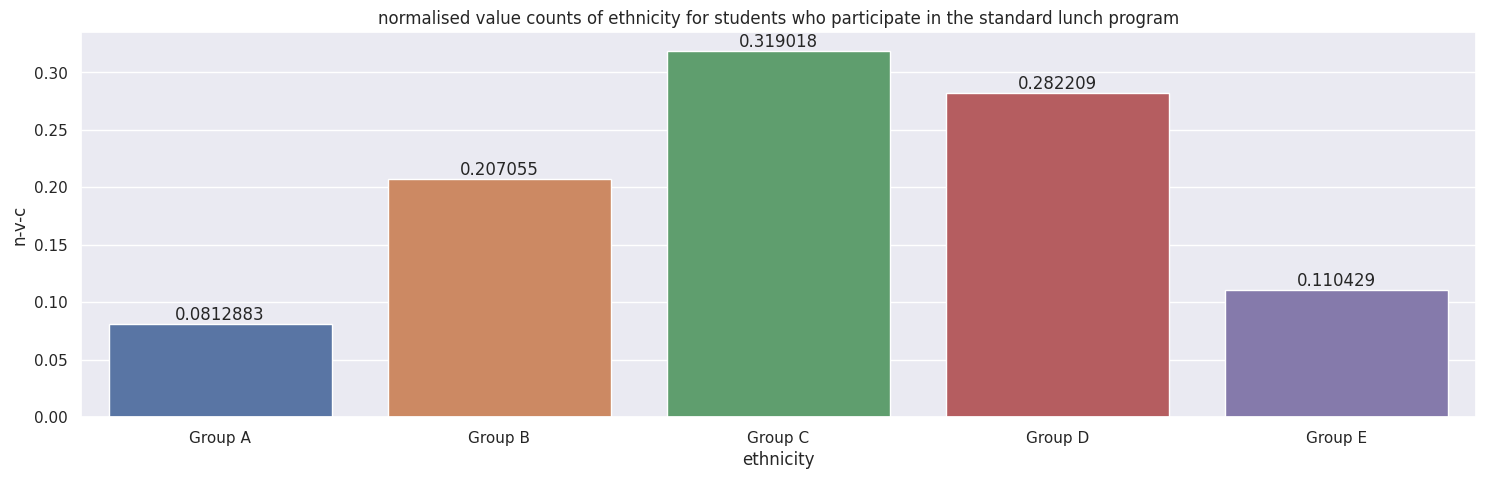

In [64]:
fig_ca_4_1 = sns.barplot(x = df_ca_4_1_vc['ethnicity'], y = df_ca_4_1_vc['n-v-c'])
plt.bar_label(fig_ca_4_1.containers[0])
plt.title('normalised value counts of ethnicity for students who participate in the standard lunch program')
plt.show()

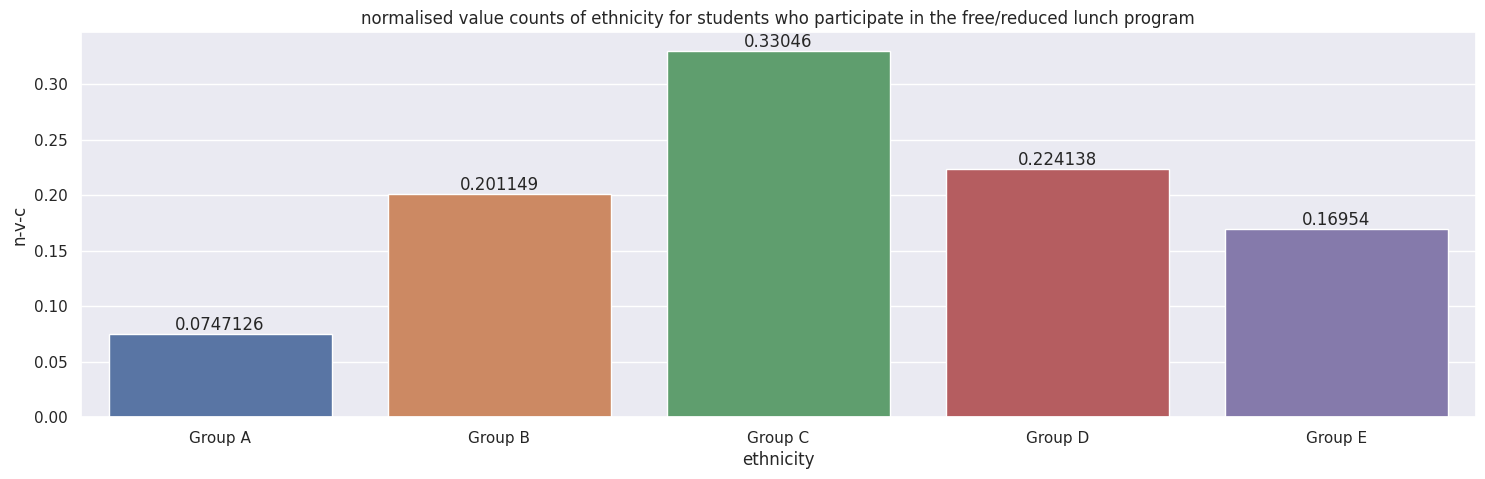

In [65]:
fig_ca_4_2 = sns.barplot(x = df_ca_4_2_vc['ethnicity'], y = df_ca_4_2_vc['n-v-c'])
plt.bar_label(fig_ca_4_2.containers[0])
plt.title('normalised value counts of ethnicity for students who participate in the free/reduced lunch program')
plt.show()

These plots indicate that ethnicity has no real influence on the lunch program that students participate in. Group D participates in the standard program at a higher rate than the free/reduced lunch program, and group E participates in the free/reduced lunch program at a higher rate than the standard program. There is no real difference in participation rate for the other ethnicities.

## Ethnicity - Test preparation course

We can now begin to validate the hypothesis that a student's ethnicity has an influence on their participation in the test preparation course. We know from our previous analyses that student ethnicity influences parental education, and that parental education influences participation in the test preparation course. Therefore, student ethnicity should influence participation in the test preparation course.

Firstly, we filter the dataframe to the relevant columns:

In [66]:
df_ca_5 = df_ca.filter(['ethnicity', 'test_preparation_course'])
df_ca_5

,ethnicity,test_preparation_course
0,1,1
1,4,2
2,5,2
3,2,2
4,5,1
...,...,...
995,3,2
996,4,1
997,3,2
998,3,2


Now we query by `test_preparation_course`

In [67]:
df_ca_5_1 = df_ca_5.query('test_preparation_course == 1')
df_ca_5_1

,ethnicity,test_preparation_course
0,1,1
4,5,1
7,5,1
10,5,1
11,4,1
...,...,...
987,1,1
989,4,1
994,5,1
996,4,1


In [68]:
df_ca_5_2 = df_ca_5.query('test_preparation_course == 2')
df_ca_5_2

,ethnicity,test_preparation_course
1,4,2
2,5,2
3,2,2
5,4,2
6,1,2
...,...,...
992,3,2
993,1,2
995,3,2
997,3,2


And now the normalised value counts:

In [69]:
ps_ca_5_1_vc = df_ca_5_1['ethnicity'].value_counts(normalize=True).sort_index()
ps_ca_5_1_vc
# test preparation course completed

1    0.095522
2    0.214925
3    0.304478
4    0.250746
5    0.134328
Name: ethnicity, dtype: float64

In [70]:
ps_ca_5_2_vc = df_ca_5_2['ethnicity'].value_counts(normalize=True).sort_index()
ps_ca_5_2_vc
# test preparation course NOT completed

1    0.070677
2    0.200000
3    0.332331
4    0.267669
5    0.129323
Name: ethnicity, dtype: float64

Now we construct the dataframes with which we will construct the bar plots

In [71]:
df_ca_5_1_vc = pd.DataFrame(data={
    'ethnicity': ('Group A', 'Group B', 'Group C', 'Group D', 'Group E'),
    'n-v-c': ps_ca_5_1_vc
})

df_ca_5_1_vc

,ethnicity,n-v-c
1,Group A,0.095522
2,Group B,0.214925
3,Group C,0.304478
4,Group D,0.250746
5,Group E,0.134328


In [72]:
df_ca_5_2_vc = pd.DataFrame(data={
    'ethnicity': ('Group A', 'Group B', 'Group C', 'Group D', 'Group E'),
    'n-v-c': ps_ca_5_2_vc
})

df_ca_5_2_vc

,ethnicity,n-v-c
1,Group A,0.070677
2,Group B,0.200000
3,Group C,0.332331
4,Group D,0.267669
5,Group E,0.129323


And now the barplots:

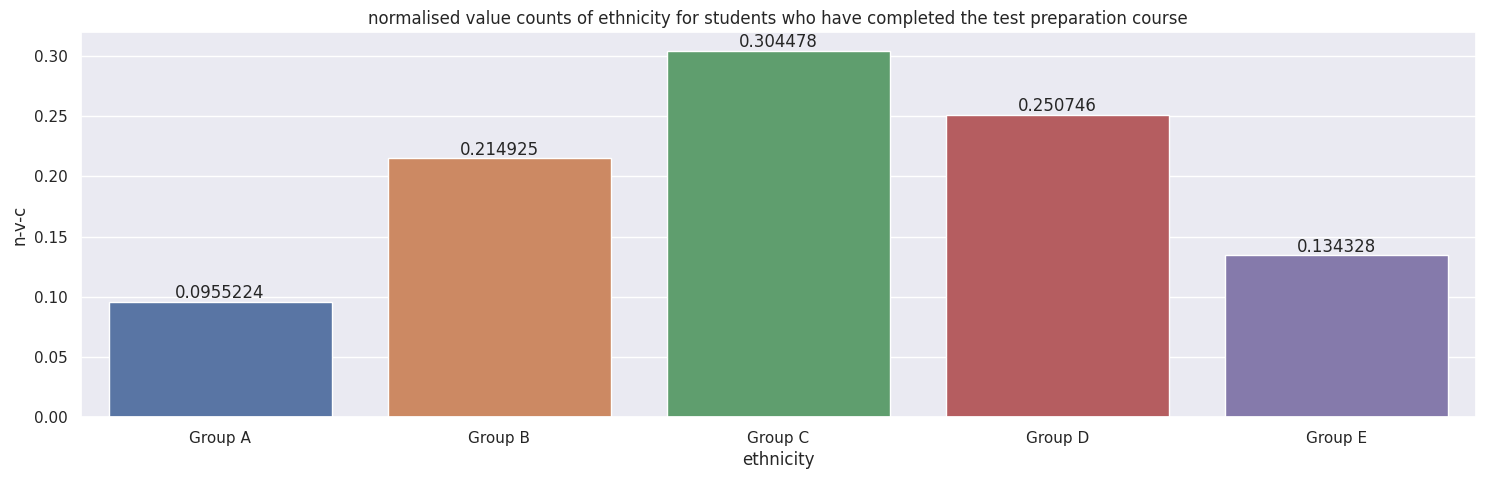

In [73]:
fig_ca_5_1 = sns.barplot(x = df_ca_5_1_vc['ethnicity'], y = df_ca_5_1_vc['n-v-c'])
plt.bar_label(fig_ca_5_1.containers[0])
plt.title('normalised value counts of ethnicity for students who have completed the test preparation course')
plt.show()

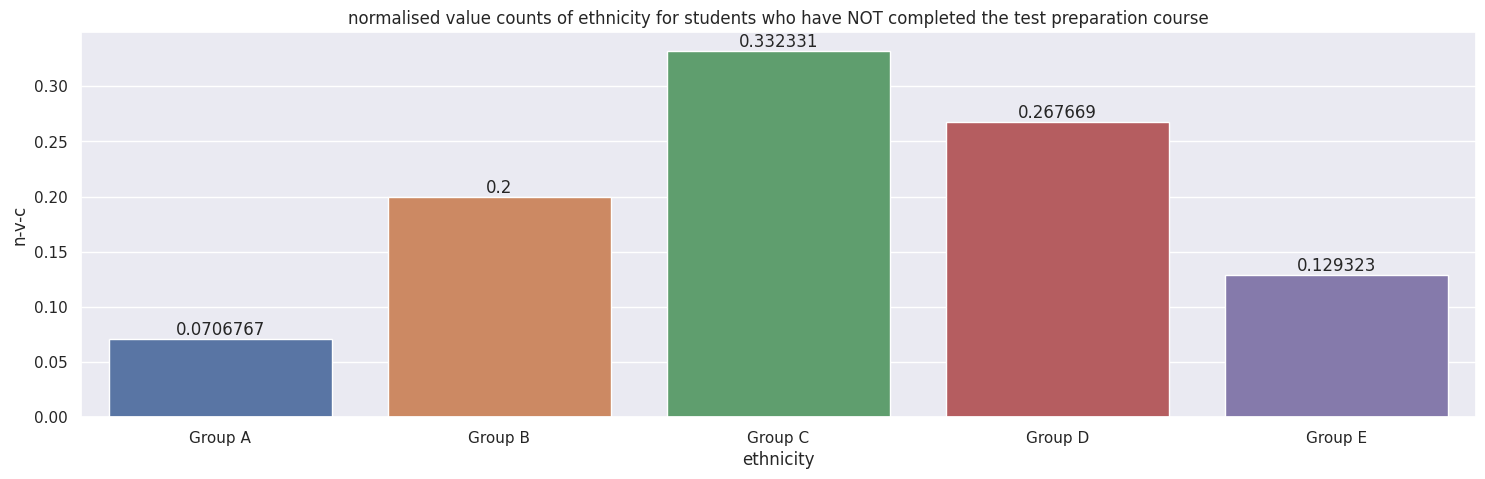

In [74]:
fig_ca_5_2 = sns.barplot(x = df_ca_5_2_vc['ethnicity'], y = df_ca_5_2_vc['n-v-c'])
plt.bar_label(fig_ca_5_2.containers[0])
plt.title('normalised value counts of ethnicity for students who have NOT completed the test preparation course')
plt.show()

These plots appear to show that a student's ethnicity does not meaningfully impact their participation in the test preparation course. Ethnic group A appears to participate in the test preparation course at a slightly higher rate, and ethnic group C appears to participate at a slightly lower rate. 

## Gender - Test preparation course

We know from our previous analyses that male and female students achieve markedly different scores in each of the stubjects. Male students perform better in mathematics, whereas female students perform better in reading and writing. We also know that the test preparation course has an effect on a student's test scores. It is therefore possible that one gender participates in the test preparation course more than the other.

First, as always, we must filter the dataframe down to the relevant columns:

In [75]:
df_ca_6 = df_ca.filter(['gender', 'test_preparation_course'])
df_ca_6

,gender,test_preparation_course
0,1,1
1,2,2
2,1,2
3,1,2
4,1,1
...,...,...
995,1,2
996,1,1
997,2,2
998,2,2


Now we can query that dataframe by gender, so that we can understand the participation rates for each gender

In [76]:
df_ca_6_1 = df_ca_6.query('gender == 1')
df_ca_6_1

,gender,test_preparation_course
0,1,1
2,1,2
3,1,2
4,1,1
7,1,1
...,...,...
992,1,2
994,1,1
995,1,2
996,1,1


In [77]:
df_ca_6_2 = df_ca_6.query('gender == 2')
df_ca_6_2

,gender,test_preparation_course
1,2,2
5,2,2
6,2,2
11,2,1
17,2,1
...,...,...
988,2,2
991,2,2
993,2,2
997,2,2


Now we can get the normalised value counts:

In [80]:
ps_ca_6_1_vc = df_ca_6_1['test_preparation_course'].value_counts(normalize=True).sort_index()
ps_ca_6_1_vc
# male students

1    0.338491
2    0.661509
Name: test_preparation_course, dtype: float64

In [81]:
ps_ca_6_2_vc = df_ca_6_2['test_preparation_course'].value_counts(normalize=True).sort_index()
ps_ca_6_2_vc
# female students

1    0.331263
2    0.668737
Name: test_preparation_course, dtype: float64

Even at this stage, the normalised value counts series indicate that there is no real difference in test preparation course participation rates for each gender. Still, we will create dataframes and construct plots for visualisation purposes.

In [85]:
df_ca_6_1_vc = pd.DataFrame(data={
    'test_preparation_course': ('completed', 'not completed'),
    'n-v-c': ps_ca_6_1_vc
})

df_ca_6_1_vc

,test_preparation_course,n-v-c
1,completed,0.338491
2,not completed,0.661509


In [86]:
df_ca_6_2_vc = pd.DataFrame(data={
    'test_preparation_course': ('completed', 'not completed'),
    'n-v-c': ps_ca_6_2_vc
})

df_ca_6_2_vc

,test_preparation_course,n-v-c
1,completed,0.331263
2,not completed,0.668737


And now the plots:

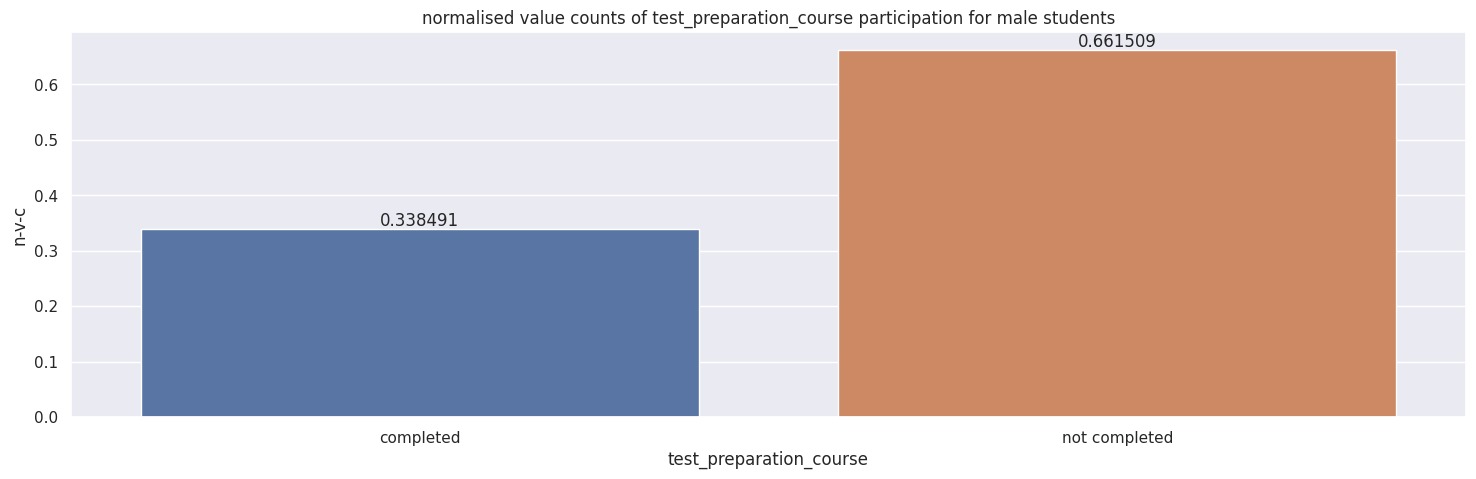

In [89]:
fig_ca_6_1 = sns.barplot(x = df_ca_6_1_vc['test_preparation_course'], y = df_ca_6_1_vc['n-v-c'])
plt.bar_label(fig_ca_6_1.containers[0])
plt.title('normalised value counts of test_preparation_course participation for male students')
plt.show()

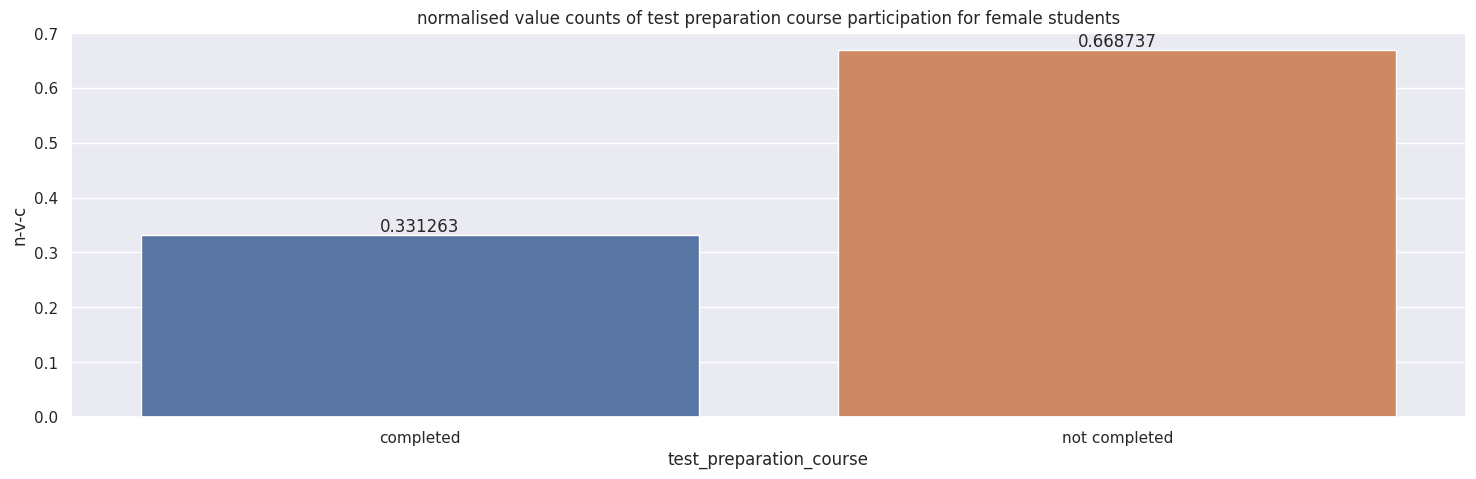

In [90]:
fig_ca_6_2 = sns.barplot(x = df_ca_6_2_vc['test_preparation_course'], y = df_ca_6_2_vc['n-v-c'])
plt.bar_label(fig_ca_6_2.containers[0])
plt.title('normalised value counts of test preparation course participation for female students')
plt.show()

As we can see, there is no material difference in participation rates for each gender. Male students tend to participate in the test preparation course at a very slightly higher rate than female students, but this is not statistically significant.

## Conclusions

For the sake of completeness, we will now gather the observations from these analyses in one place

- Parental education does have an influence on their childrens' participation in the test preparation course

- Parental education does not meaningfully influence the lunch program their children participate in

- Student ethnicity does influence parental education:

    - Ethnicity A appears to be the most highly educated, with ethnicity B following close behind

    - Ethnicities D and E appear to be less educated, with definite biases toward the lowest education levels

    - Ethnicity C appears to have middling education levels, neither excelling nor falling behin

- Student ethnicity does not meaningfully influence the lunch program that the student participates in

- Student ethnicity does not meaningfully influence their participation in the test preparation course

- Student gender does not meaningfully influence their participation in th test preparation course


